## Online Simulation-Based Digital Twin: Nibelungenbrücke

This notebook introduces an online simulation-based digital twin developed for the Nibelungenbrücke bridge. The orchestration system is designed to interact dynamically with the user by gathering key inputs; such as time, physical parameters, and spatial positions to perform real-time simulations of the bridge structure.

The simulations are powered by the FenicSXConcrete package and support both thermomechanical and structural deflection analyses. This framework enables physics-based modeling and continuous digital monitoring of the bridge's behavior.

Note: 

After confirming that you're operating within the correct Python environment, if the model still raises any library-related errors, activate the following command to ensure that all required packages are properly installed!

In [21]:
#import sys
#!{sys.executable} -m pip install git+https://github.com/BAMresearch/FenicsXConcrete pint gmsh pytest jsonschema pandas pyproj tqdm pvlib


import os
import random
#from nibelungenbruecke.scripts.digital_twin_orchestrator.interface_test_DT import DigitalTwinInterface

DigitalTwinInterface manages model selection, input generation, and execution of the digital twin simulation.

In [22]:
import random
from nibelungenbruecke.scripts.digital_twin_orchestrator.orchestrator import Orchestrator

class DigitalTwinInterface:
    def __init__(self, path):
        self.parameters_path = path
        self.available_models = ["TransientThermal_1", "Displacement_1", "Displacement_2"]
        self.current_model = self.available_models[0]
        self.orchestrator = Orchestrator(self.parameters_path, self.current_model)

    def change_model(self, model_name):
        if model_name in self.available_models:
            self.current_model = model_name
            self.orchestrator = Orchestrator(self.parameters_path, model_name)
            print(f"Model changed to: {self.current_model}")
        else:
            raise ValueError(f"Invalid model name: {model_name}")

    def generate_random_input(self, parameter: str) -> dict:
        if parameter == "rho":
            value = random.randint(90 // 5, 160 // 5) * 100
        elif parameter == "E":
            value = random.randint(100 // 5, 225 // 5) * 10**10
        else:
            raise KeyError("Invalid parameter. Choose 'rho' or 'E'.")
        return {parameter: value}

    def run(self, input_dict: dict):
        print(f"▶️ Running model {self.current_model} with input: {input_dict}")
        return self.orchestrator.run(input_dict, self.current_model)


## Launch the Digital Twin Interface

The loop below will guide you step by step. You will be prompted to:
- Run a simulation by randomizing material parameters.
- Switch between available simulation models.
- Exit the interface at any time.


In [23]:
# Create the interface and start interaction loop
path = 'use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/input/settings/digital_twin_default_parameters.json'
path = '../../../use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/input/settings/digital_twin_default_parameters.json'

dt = DigitalTwinInterface(path)

In [24]:
dt.available_models

['TransientThermal_1', 'Displacement_1', 'Displacement_2']

In [25]:
dt.change_model("Displacement_2") 

Model changed to: Displacement_2


In [26]:
input_values = dt.generate_random_input("rho")
input_values

{'rho': 2300}

▶️ Running model Displacement_2 with input: {'rho': 2300}

Module imported: <module 'displacement_model' from '/home/msoenmez/Desktop/NibelungenbrueckeDemonstrator/nibelungenbruecke/scripts/digital_twin_orchestrator/displacement_model.py'>
Info    : Reading '../../../use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/input/models/mesh.msh'...
Info    : 2443 entities
Info    : 3561 nodes
Info    : 20843 elements
Info    : Done reading '../../../use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/input/models/mesh.msh'
An error occurred while saving the model: [Errno 2] No such file or directory: 'use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/output/sensors/Displacement_2.json'
Info    : Reading '../../../use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/input/models/mesh.msh'...
Info    : 2443 entities
Info    : 3561 nodes
Info    : 20843 elements
Info    : Done reading '../../../use_cases/nibelungenbruecke_dem

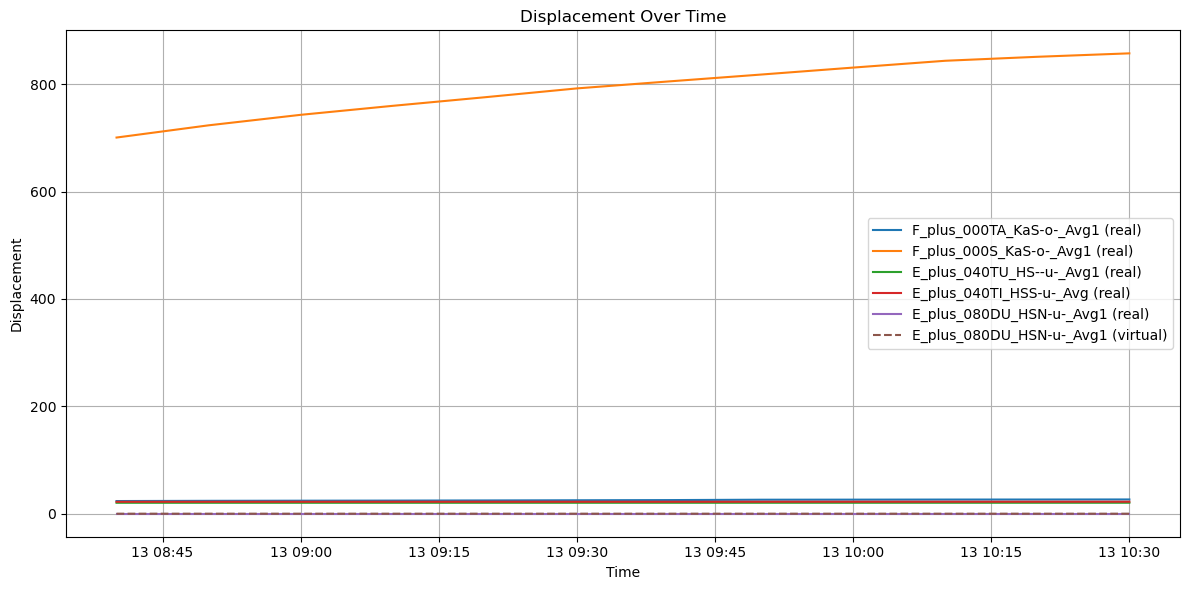

In [27]:
result = dt.run(input_values)

In [28]:
dt.current_model

'Displacement_2'

In [29]:
dt.change_model("TransientThermal_1") 
input_values = dt.generate_random_input("rho")
input_values

Model changed to: TransientThermal_1


{'rho': 2300}

▶️ Running model TransientThermal_1 with input: {'rho': 2300}

Module imported: <module 'thermal_model' from '/home/msoenmez/Desktop/NibelungenbrueckeDemonstrator/nibelungenbruecke/scripts/digital_twin_orchestrator/thermal_model.py'>
Info    : Reading '../../../use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/input/models/mesh_3d 1.msh'...
Info    : 2443 entities
Info    : 2197 nodes
Info    : 12920 elements
Info    : Done reading '../../../use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/input/models/mesh_3d 1.msh'
An error occurred while saving the model: [Errno 2] No such file or directory: 'use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/output/sensors/transientthermal.json'
Info    : Reading '../../../use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/input/models/mesh_3d 1.msh'...
Info    : 2443 entities
Info    : 2197 nodes
Info    : 12920 elements
Info    : Done reading '../../../use_cases/nibelungen

100%|██████████| 720/720 [04:30<00:00,  2.66it/s]


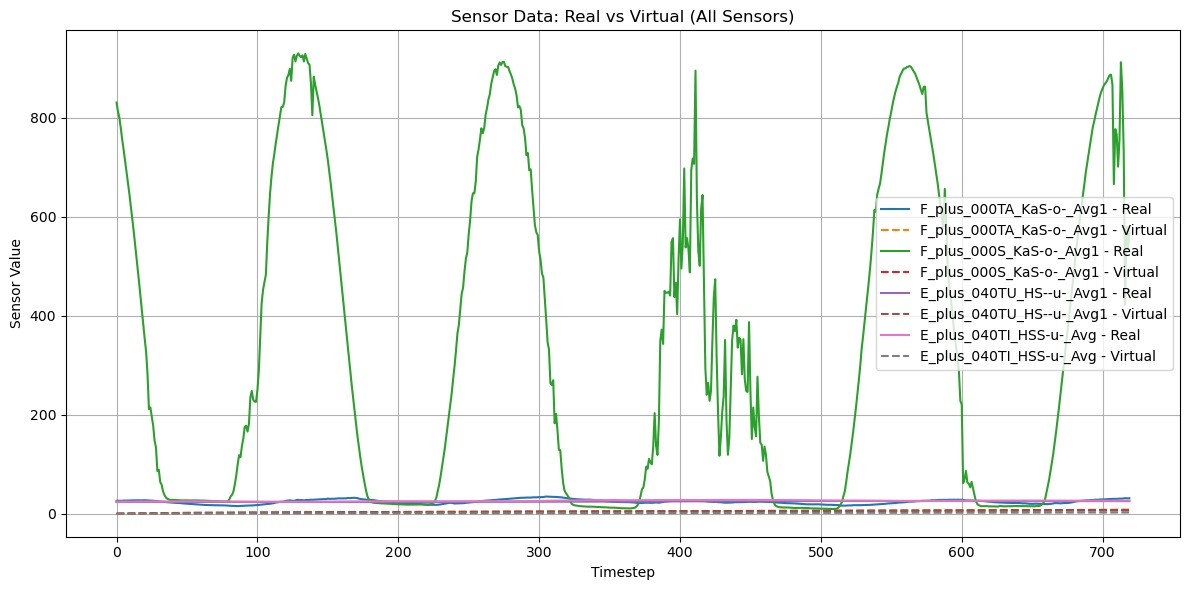

In [30]:
result = dt.run(input_values)

Execute the digital twin simulation using the loaded model and parameters. This will simulate the bridge behavior based on the selected physics model (e.g., thermal or displacement) and input configuration.